# Обучение остальных моделей

Подгрузка данных для обучения и тестирования моделей

In [68]:
import pickle

with open("import_data.pkl", "rb") as f:
    import_data = pickle.load(f)

train_x = import_data["train_x"]
test_x = import_data["test_x"]
train_y = import_data["train_y"]
test_y = import_data["test_y"]
check_commit = import_data["commit"]

### обучаем модель KNN

In [64]:
from sklearn.neighbors import KNeighborsClassifier

n_neighbors = 20
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors)
knn_model.fit(train_x, train_y)

KNeighborsClassifier(n_neighbors=20)

Проверим качество модели на основе метрики ROС-AUC

In [65]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_y, knn_model.predict_proba(test_x)[:,1])

0.7734261616288074

### Обучим модель SVM(SVC - так как задача классификации)

In [42]:
from sklearn.svm import LinearSVC

svc_model = LinearSVC(penalty='l2', C=0.1) # с регуляризацией результат лучше на 0.001
svc_model.fit(train_x, train_y)

LinearSVC(C=0.1)

Получим предсказания модели на тестовой выборке и проверим качество модели на основе ROC_AUC

In [43]:
roc_auc_score(test_y, svc_model.predict(test_x))

0.7190645764071463

Наша модель SVC предсказывает результат с точостью 0.71

# Построим матрицу ошибок для каждой модели

In [44]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

### для knn

Text(50.722222222222214, 0.5, 'true values')

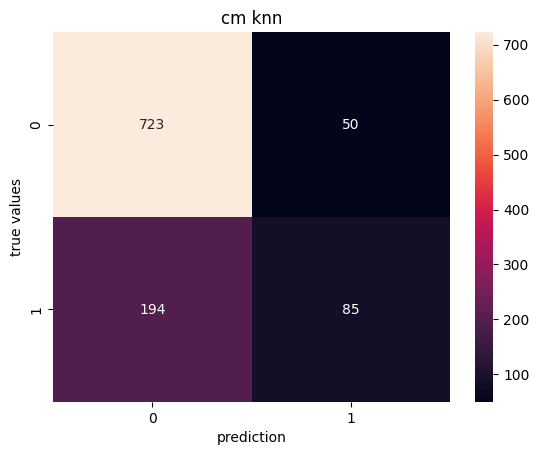

In [45]:
cm_knn = confusion_matrix(test_y ,knn_model.predict(test_x))
sns.heatmap(cm_knn, annot=True, fmt='d')
plt.title("cm knn")
plt.xlabel('prediction')
plt.ylabel('true values')

### для svc

Text(50.722222222222214, 0.5, 'true values')

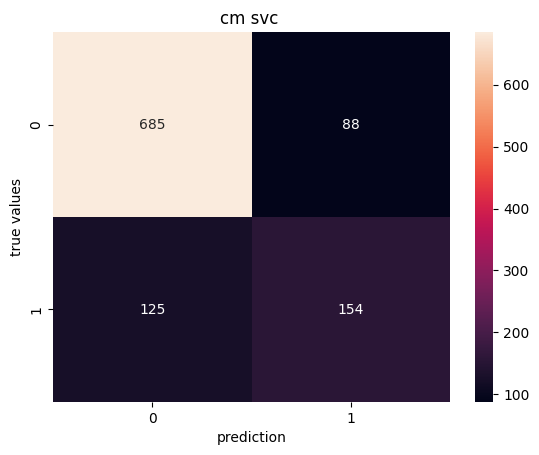

In [47]:
cm_svc = confusion_matrix(test_y ,svc_model.predict(test_x))
sns.heatmap(cm_svc, annot=True, fmt='d')
plt.title("cm svc ")
plt.xlabel('prediction')
plt.ylabel('true values')

# Обучение ансамблей моделей

### Обучение модели случайного леса

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc_model = RandomForestClassifier(max_depth=11, n_estimators=15, class_weight={1:4.3, 0:1})
rfc_model.fit(train_x, train_y)

RandomForestClassifier(class_weight={0: 1, 1: 4.3}, max_depth=11,
                       n_estimators=15)

Получим предсказания модели на тестовой выборке и проверим качество модели на основе ROC_AUC

In [49]:
roc_auc_score(test_y, rfc_model.predict_proba(test_x)[:,1])

0.8252467925088214

### Обучение модели градиентного бустинга(scikit-learn)

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_model = GradientBoostingClassifier(n_estimators=250)
gbc_model.fit(train_x, train_y)

GradientBoostingClassifier(n_estimators=250)

Получим предсказания модели на тестовой выборке и проверим качество модели на основе ROC_AUC

In [51]:
roc_auc_score(test_y, gbc_model.predict_proba(test_x)[:,1])

0.8386656280283955

### Обучение модели градиентного бустинга(LightGBM)

In [52]:
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(class_weight={1:2.4, 0:1}, max_depth=2, learning_rate=0.121, n_estimators=72, verbosity=-1 )

lgbm_model.fit(train_x, train_y)

LGBMClassifier(class_weight={0: 1, 1: 2.4}, learning_rate=0.121, max_depth=2,
               n_estimators=72, verbosity=-1)

Получим предсказания модели на тестовой выборке и проверим качество модели на основе ROC_AUC

In [53]:
roc_auc_score(test_y, lgbm_model.predict_proba(test_x)[:,1])

0.8412691788729847

# Построим матрицу ошибок для каждого ансамбля

### Для RandomForest

Text(50.722222222222214, 0.5, 'true values')

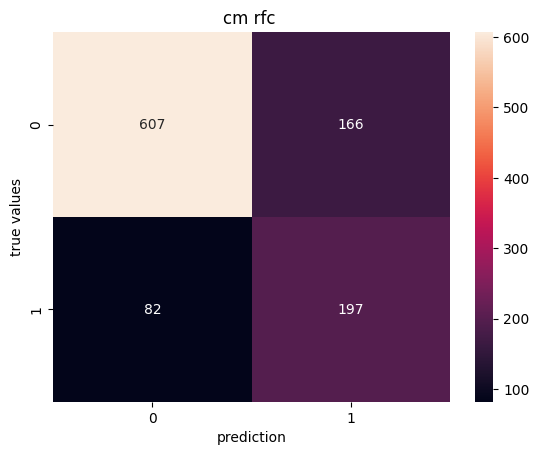

In [54]:
cm_rfc = confusion_matrix(test_y ,rfc_model.predict(test_x))
sns.heatmap(cm_rfc, annot=True, fmt='d')
plt.title("cm rfc ")
plt.xlabel('prediction')
plt.ylabel('true values')

### Для GradientBoostig(sklearn)

Text(50.722222222222214, 0.5, 'true values')

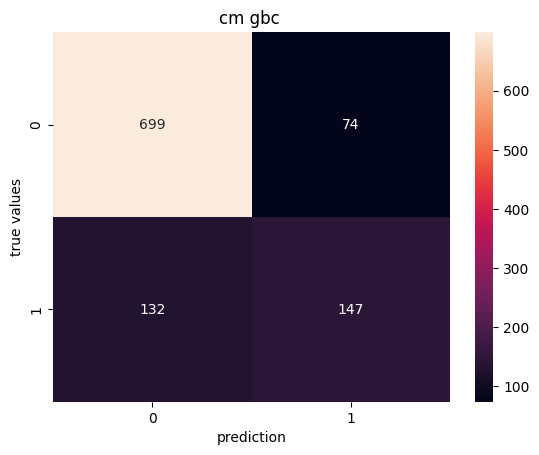

In [55]:
cm_gbc = confusion_matrix(test_y ,gbc_model.predict(test_x))
sns.heatmap(cm_gbc, annot=True, fmt='d')
plt.title("cm gbc ")
plt.xlabel('prediction')
plt.ylabel('true values')

### Для GradientBoosting(LightGBM)

Text(50.722222222222214, 0.5, 'true values')

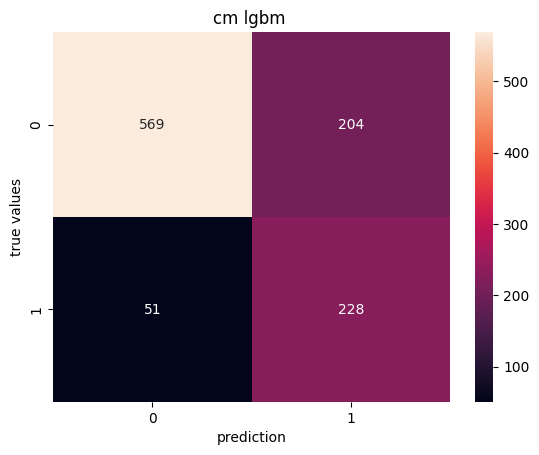

In [56]:
cm_lgbm = confusion_matrix(test_y ,lgbm_model.predict(test_x))
sns.heatmap(cm_lgbm, annot=True, fmt='d')
plt.title("cm lgbm ")
plt.xlabel('prediction')
plt.ylabel('true values')

# Подготовим файлы на отправку

### Обработаем commit-выборку

In [61]:
import pandas as pd

check_commit = pd.read_csv("test.csv") #для контрольных предсказаний

### Предскажем значения knn для commit-выборки

In [69]:
knn_commit_predict = knn_model.predict_proba(check_commit)[:,1]

submission = pd.DataFrame({'Id': check_commit.index,
                           'Churn': knn_commit_predict})

submission.to_csv('submissions/submission_knn.csv', index=False)



### Предскажем значения SVC для commit-выборки

In [70]:
svc_commit_predict = svc_model.predict_proba(check_commit)[:,1]

submission = pd.DataFrame({"Id": check_commit.index,
                          'Churn':svc_commit_predict})
submission.to_csv('submissions/submission_svc.csv', index=False)

NameError: name 'check_commit_encoded' is not defined

# Для ансамблей

### Предскажем значения RFC для commit-выборки

In [ ]:
rfc_commit_predict = rfc_model.predict(check_commit_encoded)

submission = pd.DataFrame({"Id": check_commit.index,
                          'Churn':rfc_commit_predict})
submission.to_csv('submissions/submission_rfc.csv', index=False)

### Предскажем значения GBC(sklearn) для commit_выборки

In [ ]:
gbc_commit_predict = gbc_model.predict(check_commit_encoded)

submission = pd.DataFrame({"Id": check_commit.index,
                          'Churn':gbc_commit_predict})
submission.to_csv('submissions/submission_gbc.csv', index=False)

### Предскажем значения LightGBM для commit_выборки

In [ ]:
lgbm_commit_predict = lgbm_model.predict(check_commit_encoded)

submission = pd.DataFrame({"Id": check_commit.index,
                          'Churn':lgbm_commit_predict})
submission.to_csv('submissions/submission_lgbm.csv', index=False)